# Task 1: Linear Regression model

We have taken the Real estate valuation data set from UCI repository. We have split the X values to be the following columns: 'X1 transaction date', 'X2 house age', 'X3 distance to the nearest MRT station', 'X4 number of convenience stores', 'X5 latitude', 'X6 longitude'. We have then split the data into training and testing sets after which we have standardized the data.

In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score, classification_report, confusion_matrix
from sklearn.inspection import permutation_importance


# fetch dataset
real_estate_valuation = fetch_ucirepo(id=477)

# data (as pandas dataframes)
X = real_estate_valuation.data.features
y = real_estate_valuation.data.targets

X = X[['X1 transaction date', 'X2 house age', 'X3 distance to the nearest MRT station', 'X4 number of convenience stores', 'X5 latitude', 'X6 longitude']]

# Split the dataset into a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
X_train_scaled = StandardScaler().fit_transform(X_train)
X_test_scaled = StandardScaler().fit_transform(X_test)


Here we train a Linear Regression model from the training data.

In [ ]:
# Linear Regression
model = LinearRegression()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)


We then plot the features against the house price of unit area to see more information about them.

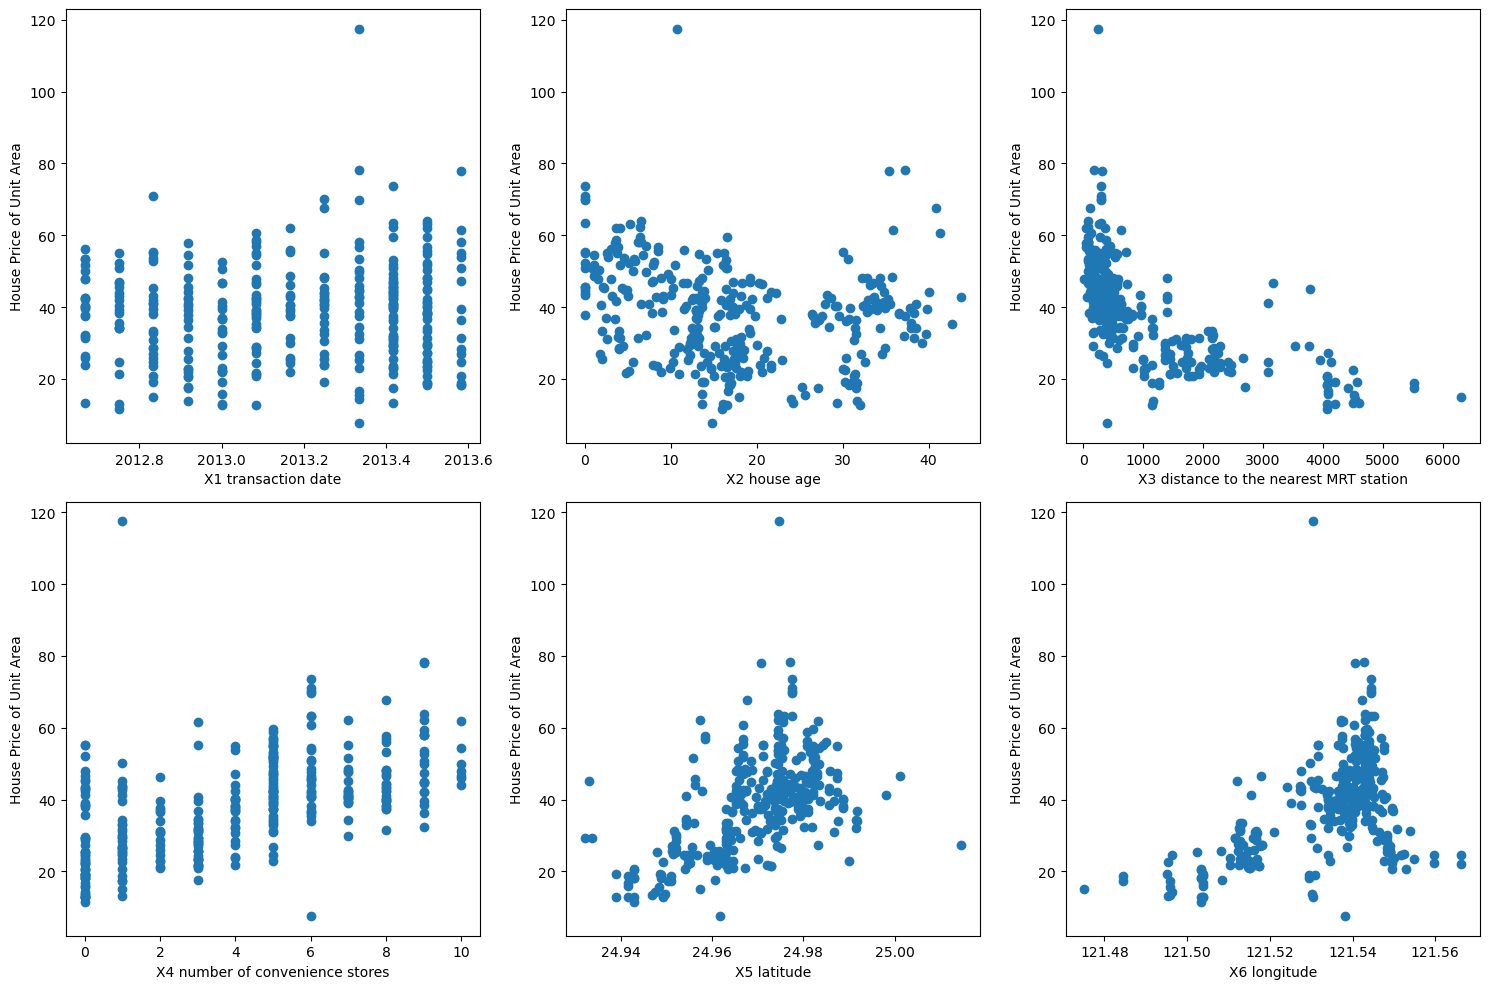

In [75]:
# List of features to plot
features = ['X1 transaction date', 'X2 house age', 'X3 distance to the nearest MRT station', 'X4 number of convenience stores', 'X5 latitude', 'X6 longitude']

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
axes = axes.flatten()

# Plot each feature
for i, feature in enumerate(features):
    axes[i].scatter(X_train[feature], y_train)
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('House Price of Unit Area')

plt.tight_layout()
plt.show()

Here we see each feature plotted against the house price of unit area. We can see that the number of convenience stores has a positive correlation with the house price of unit area. The distance to the nearest MRT station has a negative correlation with the house price of unit area. The other features show less clear correlation with the house price of unit area.

In [93]:
b0 = model.intercept_
b1, b2, b3, b4, b5, b6 = model.coef_[0]
print("Intercept:", b0)
print("Coefficients:")
print("X1 transaction date:", b1)
print("X2 house age:", b2)
print("X3 distance to the nearest MRT station:", b3)
print("X4 number of convenience stores:", b4)
print("X5 latitude:", b5)
print("X6 longitude:", b6)

Intercept: [38.39154079]
Coefficients:
X1 transaction date: 1.5296311293386962
X2 house age: -3.0626944118090966
X3 distance to the nearest MRT station: -5.786925608033045
X4 number of convenience stores: 3.2188727017566388
X5 latitude: 2.855107847927548
X6 longitude: -0.44100860256121255


We then plot the predictions against the actual values. The red dashed line represents the ideal fit where the predicted values are equal to the actual values. The closer the points are to the red dashed line, the better the model.

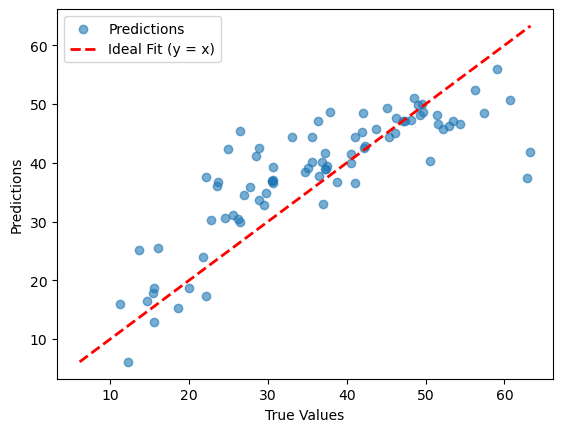

In [92]:
# Convert y_test to a NumPy array if it's a Pandas DataFrame
y_test_array = y_test.to_numpy().flatten()
y_pred_array = y_pred.flatten()  # Ensure it's a 1D NumPy array

# Scatter plot of predictions vs actual values
plt.scatter(y_test_array, y_pred_array, label='Predictions', alpha=0.6)
plt.xlabel('True Values')
plt.ylabel('Predictions')

# Add a trendline (y = x line for perfect prediction)
min_val = min(y_test_array.min(), y_pred_array.min())
max_val = max(y_test_array.max(), y_pred_array.max())

# Plot the y=x trendline
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='dashed', linewidth=2, label="Ideal Fit (y = x)")

plt.legend()
plt.show()

We then evaluate the Linear Regression model using the mean absolute error, mean squared error, and R2 score.

In [77]:
# Evaluation of Linear Regression
print("Linear Regression Metrics:")
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R2 Score:', r2_score(y_test, y_pred))

Linear Regression Metrics:
Mean Absolute Error: 5.736478809674765
Mean Squared Error: 57.85793466977276
R2 Score: 0.6551143134174902
Intercept: [38.39154079]
Coefficients:
X1 transaction date: 1.5296311293386962
X2 house age: -3.0626944118090966
X3 distance to the nearest MRT station: -5.786925608033045
X4 number of convenience stores: 3.2188727017566388
X5 latitude: 2.855107847927548
X6 longitude: -0.44100860256121255
